In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [34]:
hp=pd.read_csv("iot4.csv")

In [12]:
hp.head(20)

,UserId,ProductId,rating,Unnamed: 3,times
0,A3SGXH7AUHU8GW,B001E4KFG0,4,NaN,1365811200
1,A1D87F6ZCVE5NK,B00813GRG4,3,NaN,1341100800
2,ABXLMWJIXXAIN,B000LQOCH0,4,NaN,1341100600
3,A395BORC6FGVXV,B000UA0QIQ,5,NaN,1374451200
4,A1UQRSCLF8GW1T,B006K2ZZ7K,5,NaN,1334707200
5,ADT0SRK1MGOEU,B006K2ZZ7K,5,NaN,1356457805
6,A1SP2KVKFXXRU1,B006K2ZZ7K,5,NaN,1465768902
7,A3JRGQVEQN31IQ,B006K2ZZ7K,1,NaN,1567834200
8,A1MZYO9TZK0BBI,B000E7L2R4,4,NaN,1345768936
9,A21BT40VZCCYT4,B00171APVA,2,NaN,1567620030


In [14]:
hp["rating"].value_counts(10)

5    0.627119
4    0.203390
3    0.067797
1    0.067797
2    0.033898
Name: rating, dtype: float64

In [15]:
hp.info

<bound method DataFrame.info of             UserId   ProductId  rating  Unnamed: 3       times
0   A3SGXH7AUHU8GW  B001E4KFG0       4         NaN  1365811200
1   A1D87F6ZCVE5NK  B00813GRG4       3         NaN  1341100800
2    ABXLMWJIXXAIN  B000LQOCH0       4         NaN  1341100600
3   A395BORC6FGVXV  B000UA0QIQ       5         NaN  1374451200
4   A1UQRSCLF8GW1T  B006K2ZZ7K       5         NaN  1334707200
5    ADT0SRK1MGOEU  B006K2ZZ7K       5         NaN  1356457805
6   A1SP2KVKFXXRU1  B006K2ZZ7K       5         NaN  1465768902
7   A3JRGQVEQN31IQ  B006K2ZZ7K       1         NaN  1567834200
8   A1MZYO9TZK0BBI  B000E7L2R4       4         NaN  1345768936
9   A21BT40VZCCYT4  B00171APVA       2         NaN  1567620030
10  A3HDKO7OW0QNK4  B0001PB9FE       5         NaN  1453567200
11  A2725IB4YY9JEB  B0009XLVG0       4         NaN  1562726200
12   A327PCT23YH90  B0009XLVG0       5         NaN  1426532300
13  A18ECVX2RJ7HUE  B001GVISJM       5         NaN  1362472400
14  A2MUGFV2TDQ47K  B00

In [18]:
popular_products = pd.DataFrame(hp.groupby('ProductId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
ProductId,
B001EO5QW8,19
B001GVISJM,15
B006K2ZZ7K,4
B000G6RPMY,3
B004N5KULM,3
B0009XLVG0,2
B003F6UO7K,2
B002GWHC0G,2
B0001PB9FE,1


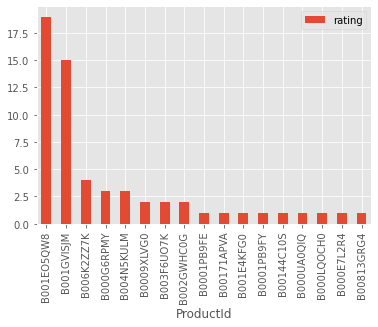

In [62]:
most_popular.head(30).plot(kind = "bar")

In [44]:
hp = hp.head(35)

In [46]:
rating_utility_matrix = hp.pivot_table(values='rating', index='UserId', columns='ProductId', fill_value=0)
rating_utility_matrix.head()

ProductId,B0001PB9FE,B0001PB9FY,B0009XLVG0,B000E7L2R4,B000G6RPMY,B000LQOCH0,B000UA0QIQ,B00144C10S,B00171APVA,B001E4KFG0,B001EO5QW8,B001GVISJM,B002GWHC0G,B003F6UO7K,B004N5KULM,B006K2ZZ7K,B00813GRG4
UserId,,,,,,,,,,,,,,,,,
A108P30XVUFKXY,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
A16XFOYQSJREL7,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
A17DW6SUOC70DJ,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
A18ECVX2RJ7HUE,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
A1CZX3CP8IKQIJ,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0


In [47]:
X = rating_utility_matrix.T
X.head()

UserId,A108P30XVUFKXY,A16XFOYQSJREL7,A17DW6SUOC70DJ,A18ECVX2RJ7HUE,A1CZX3CP8IKQIJ,A1D87F6ZCVE5NK,A1MYS9LFFBIYKM,A1MZYO9TZK0BBI,A1ND7WC5LXOU48,A1SP2KVKFXXRU1,...,ALOR97KTZTK1P,AO80AC8313NIZ,AOVROBZ8BNTP7,AQ9DWWYP2KJCQ,AQCY5KRO7489S,AQLL2R1PPR46X,ARYVQL4N737A1,ASCNNAJU6SXF8,AZOF9E17RGZH8,B004N5KULM
ProductId,,,,,,,,,,,,,,,,,,,,,
B0001PB9FE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0001PB9FY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0009XLVG0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000E7L2R4,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
B000G6RPMY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [48]:
X.shape

(17, 58)

In [49]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(17, 10)

In [50]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(17, 17)

In [55]:
X.index[11]

'B001GVISJM'

In [56]:
i = "B001GVISJM"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

11

In [57]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(17,)

In [60]:
Recommend = list(X.index[correlation_product_ID > 0.10])

Recommend.remove(i) 

Recommend[0:10]

['B000E7L2R4']

In [64]:
product_descriptions = pd.read_csv('iothub.csv')
product_descriptions.shape

(61, 2)

In [66]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head(20)

,product uid,product_description
0,100001,RPM Double Shaft BO Motor Straight
1,100002,Robot Wheel for BO Motors (Yellow)
2,100003,Character Green Backlight LCD Display
3,100004,RGB Led Matrix Display
4,100005,Channel Relay
5,100006,keypad
6,100007,V Rechargeable Lithium-ion Battery Pack
7,100008,Channel Flame Sensor Module
8,100009,Segment Display common anode 10 pcs
9,100010,LED Matrix Display


In [70]:
product_descriptions1 = product_descriptions.head(500)

product_descriptions1["product_description"].head(20)

0                  RPM Double Shaft BO Motor   Straight
1                    Robot Wheel for BO Motors (Yellow)
2                 Character Green Backlight LCD Display
3                                RGB Led Matrix Display
4                                         Channel Relay
5                                                keypad
6               V Rechargeable Lithium-ion Battery Pack
7                           Channel Flame Sensor Module
8                   Segment Display common anode 10 pcs
9                                    LED Matrix Display
10                            Led Matrix Display 4 in 1
11              Long Life Zinc Carbon Battery 10 pcs 9v
12     Hall Effect Sensor Magnet Detector Switch for...
13                                         Arduino Mega
14                                         Arduino Nano
15                                          Arduino Uno
16                                  BMP Pressure Sensor
17       Coding Champion Age 15 Online Courses F

In [76]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<60x125 sparse matrix of type '<class 'numpy.float64'>'
	with 236 stored elements in Compressed Sparse Row format>

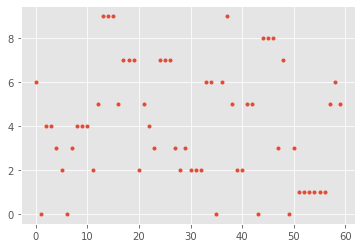

In [77]:

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


In [78]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 courses
 kids
 drones
 age
 online
 champion
 relay
 coding
 channel
 15
Cluster 1:
 sensore
 dht11
 joystick
 ir
 flame
 zinc
 double
 effect
 drones
 driver
Cluster 2:
 display
 matrix
 led
 raspberry
 pi
 nodemcu
 ic
 clock
 case
 digital
Cluster 3:
 module
 rfid
 bluetooth
 wifi
 sensor
 temperature
 flame
 digital
 channel
 camera
Cluster 4:
 sensor
 pir
 color
 photoresistor
 dht22
 soil
 mq3
 moisture
 pressure
 bmp
Cluster 5:
 motor
 driver
 stepper
 micro
 servo
 board
 rpm
 straight
 shaft
 double
Cluster 6:
 smart
 online
 live
 paced
 self
 irrigation
 course
 water
 monitoring
 iot
Cluster 7:
 arduino
 mini
 mega
 uno
 nano
 switch
 compatible
 reed
 blue
 pro
Cluster 8:
 pcs
 battery
 male
 10
 ion
 lithium
 pack
 rechargeable
 segment
 anode
Cluster 9:
 keypad
 zinc
 green
 course
 courses
 detector
 dht11
 dht22
 digital
 display


In [79]:
print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [80]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [81]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[6]
